In [1]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.utils.multiclass import unique_labels
from sklearn import svm, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import scipy.sparse as sp
import numpy as np
import matplotlib.pyplot as plt
import generatevector
from preprocess.parse import getRootSuffix
from argparse import Namespace
from tqdm import tqdm
import time
import CrossValidation
import warnings

In [5]:
def svd(vectors, dim=10):
    svd = TruncatedSVD(n_components=dim, n_iter=10,random_state=2019)
    svd_vectors = svd.fit_transform(vectors)
    svd_exp_ratio = svd.explained_variance_ratio_
    svd_cum_exp = svd.explained_variance_ratio_.sum()
    print('Cumulated Explained Variance: {:.8f}'.format(svd_cum_exp))
    return svd_vectors, svd_exp_ratio, svd_cum_exp

In [3]:
args = Namespace(
        stop = False, 
        stem = False, 
        mime = False, 
        digit = True, 
        other = True
    )
vectors, labels, uni, filename, features = generatevector.vectoriser('tfidf', args)

In [6]:
ReducedVector, ExplainedRatio, CumulatedVariance = svd(vectors, 2500)

Cumulated Explained Variance: 0.78256866


## Reducted Dim matrix


Finished model LogisticRegression on cornell validation set
Execution Time: 00:00:10
Classification performance on university set:
Accuracy: 0.810191
Precision:0.801853
Recall:0.810191
F1_Score:0.803364

Finished model LogisticRegression on texas validation set
Execution Time: 00:00:10
Classification performance on university set:
Accuracy: 0.796519
Precision:0.790692
Recall:0.796519
F1_Score:0.788920

Finished model LogisticRegression on washington validation set
Execution Time: 00:00:09
Classification performance on university set:
Accuracy: 0.840367
Precision:0.837914
Recall:0.840367
F1_Score:0.836882

Finished model LogisticRegression on wisconsin validation set
Execution Time: 00:00:10
Classification performance on university set:
Accuracy: 0.814847
Precision:0.840477
Recall:0.814847
F1_Score:0.818530
============================== Report overall cross validation performance ==============================
Accuracy: 0.817627
Precision:0.817995
Recall:0.817627
F1_Score:0.815228
Con

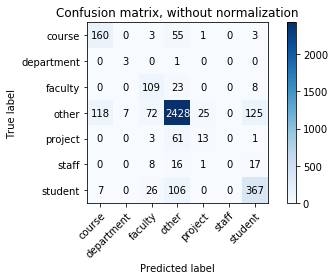

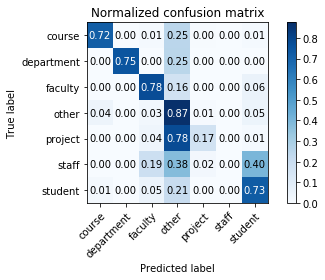


Finished model SVC on cornell validation set
Execution Time: 00:02:03
Classification performance on university set:
Accuracy: 0.791083
Precision:0.797934
Recall:0.791083
F1_Score:0.790863

Finished model SVC on texas validation set
Execution Time: 00:02:02
Classification performance on university set:
Accuracy: 0.785810
Precision:0.788068
Recall:0.785810
F1_Score:0.781422

Finished model SVC on washington validation set
Execution Time: 00:01:60
Classification performance on university set:
Accuracy: 0.842202
Precision:0.851117
Recall:0.842202
F1_Score:0.843011

Finished model SVC on wisconsin validation set
Execution Time: 00:01:57
Classification performance on university set:
Accuracy: 0.777293
Precision:0.830768
Recall:0.777293
F1_Score:0.788761
============================== Report overall cross validation performance ==============================
Accuracy: 0.800637
Precision:0.814280
Recall:0.800637
F1_Score:0.803710
Confusion matrix, without normalization
[[ 165    0    3   52  

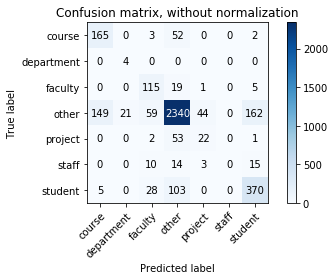

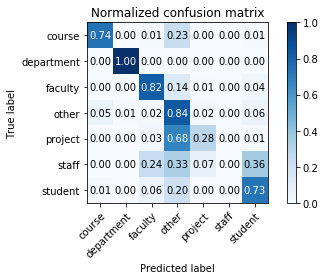


Finished model RandomForestClassifier on cornell validation set
Execution Time: 00:00:20
Classification performance on university set:
Accuracy: 0.738854
Precision:0.678432
Recall:0.738854
F1_Score:0.656236

Finished model RandomForestClassifier on texas validation set
Execution Time: 00:00:20
Classification performance on university set:
Accuracy: 0.712182
Precision:0.673374
Recall:0.712182
F1_Score:0.633867

Finished model RandomForestClassifier on washington validation set
Execution Time: 00:00:19
Classification performance on university set:
Accuracy: 0.793578
Precision:0.723533
Recall:0.793578
F1_Score:0.735692

Finished model RandomForestClassifier on wisconsin validation set
Execution Time: 00:00:19
Classification performance on university set:
Accuracy: 0.769432
Precision:0.733728
Recall:0.769432
F1_Score:0.708608
============================== Report overall cross validation performance ==============================
Accuracy: 0.758694
Precision:0.706833
Recall:0.758694
F1_Sc

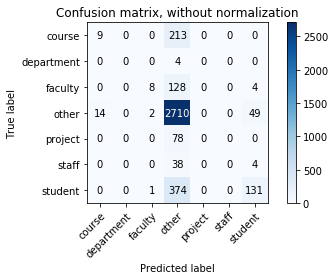

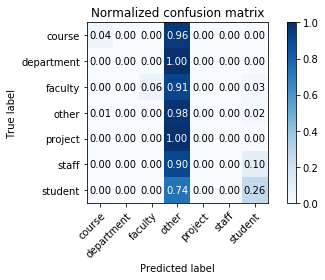


Finished model LGBMClassifier on cornell validation set
Execution Time: 00:03:07
Classification performance on university set:
Accuracy: 0.761783
Precision:0.754023
Recall:0.761783
F1_Score:0.755884

Finished model LGBMClassifier on texas validation set
Execution Time: 00:03:07
Classification performance on university set:
Accuracy: 0.755020
Precision:0.740275
Recall:0.755020
F1_Score:0.745575

Finished model LGBMClassifier on washington validation set
Execution Time: 00:03:06
Classification performance on university set:
Accuracy: 0.795413
Precision:0.825995
Recall:0.795413
F1_Score:0.805036

Finished model LGBMClassifier on wisconsin validation set
Execution Time: 00:03:08
Classification performance on university set:
Accuracy: 0.773799
Precision:0.825409
Recall:0.773799
F1_Score:0.785975
============================== Report overall cross validation performance ==============================
Accuracy: 0.773825
Precision:0.788156
Recall:0.773825
F1_Score:0.777349
Confusion matrix, w

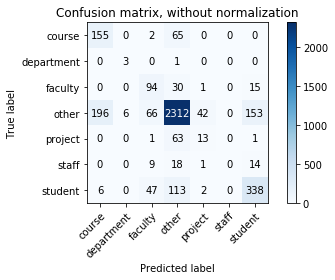

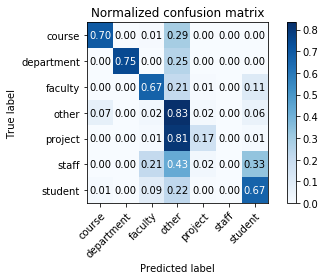

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import lightgbm as lgbm
import xgboost as xgb
warnings.filterwarnings("ignore")
seed = 2019
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# names = ["Logistic Regression", "Nearest Neighbors", "svm.LinearSVC", "Linear SVM", "RBF SVM",
#          "Decision Tree", "Random Forest", "LightGBM", "XgBoost"]
classifiers = [
    LogisticRegression(),
    SVC(kernel="linear", probability=False, random_state=seed),
    RandomForestClassifier(max_depth=10, n_estimators=50,random_state=seed),
    lgbm.LGBMClassifier()]
classes = ["course", "department", "faculty", "other", "project", "staff", "student"]
args = Namespace(
        stop = False, 
        stem = False, 
        mime = False, 
        digit = True, 
        other = True
    )
# vectors, labels, uni, filename, features = generatevector.vectoriser('tfidf', args)
vec = ReducedVector[:, :2500]
for clf in classifiers:
    print('='*100)
    print('='*100)
    print('='*100)
    label_t, label_p = CrossValidation.CrossValidation(clf, vec, labels, uni, classes, partial_p=True, cfsm=True)

## Original Matrix


Finished model LogisticRegression on cornell validation set
Execution Time: 00:00:12
Classification performance on university set:
Accuracy: 0.812739
Precision:0.802829
Recall:0.812739
F1_Score:0.805252

Finished model LogisticRegression on texas validation set
Execution Time: 00:00:11
Classification performance on university set:
Accuracy: 0.792503
Precision:0.786139
Recall:0.792503
F1_Score:0.784518

Finished model LogisticRegression on washington validation set
Execution Time: 00:00:10
Classification performance on university set:
Accuracy: 0.840367
Precision:0.837877
Recall:0.840367
F1_Score:0.836751

Finished model LogisticRegression on wisconsin validation set
Execution Time: 00:00:10
Classification performance on university set:
Accuracy: 0.815721
Precision:0.839696
Recall:0.815721
F1_Score:0.819104
============================== Report overall cross validation performance ==============================
Accuracy: 0.817627
Precision:0.817438
Recall:0.817627
F1_Score:0.815050
Con

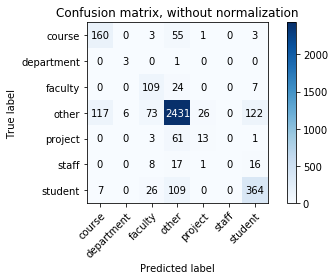

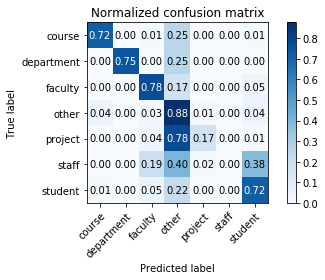


Finished model SVC on cornell validation set
Execution Time: 00:00:52
Classification performance on university set:
Accuracy: 0.783439
Precision:0.794131
Recall:0.783439
F1_Score:0.784690

Finished model SVC on texas validation set
Execution Time: 00:00:53
Classification performance on university set:
Accuracy: 0.787149
Precision:0.788862
Recall:0.787149
F1_Score:0.782148

Finished model SVC on washington validation set
Execution Time: 00:00:51
Classification performance on university set:
Accuracy: 0.842202
Precision:0.850178
Recall:0.842202
F1_Score:0.843356

Finished model SVC on wisconsin validation set
Execution Time: 00:00:49
Classification performance on university set:
Accuracy: 0.783406
Precision:0.836324
Recall:0.783406
F1_Score:0.794895
============================== Report overall cross validation performance ==============================
Accuracy: 0.801168
Precision:0.815167
Recall:0.801168
F1_Score:0.804525
Confusion matrix, without normalization
[[ 161    0    3   56  

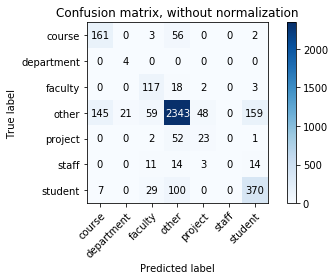

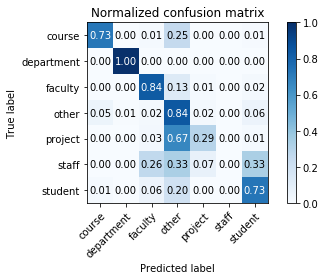


Finished model RandomForestClassifier on cornell validation set
Execution Time: 00:00:10
Classification performance on university set:
Accuracy: 0.765605
Precision:0.754772
Recall:0.765605
F1_Score:0.699946

Finished model RandomForestClassifier on texas validation set
Execution Time: 00:00:09
Classification performance on university set:
Accuracy: 0.752343
Precision:0.720540
Recall:0.752343
F1_Score:0.688981

Finished model RandomForestClassifier on washington validation set
Execution Time: 00:00:09
Classification performance on university set:
Accuracy: 0.838532
Precision:0.811786
Recall:0.838532
F1_Score:0.801869

Finished model RandomForestClassifier on wisconsin validation set
Execution Time: 00:00:09
Classification performance on university set:
Accuracy: 0.820961
Precision:0.804497
Recall:0.820961
F1_Score:0.782496
============================== Report overall cross validation performance ==============================
Accuracy: 0.800903
Precision:0.785936
Recall:0.800903
F1_Sc

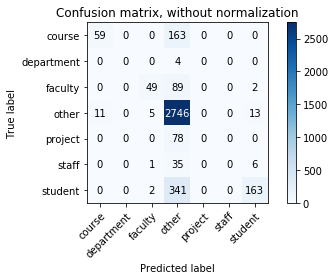

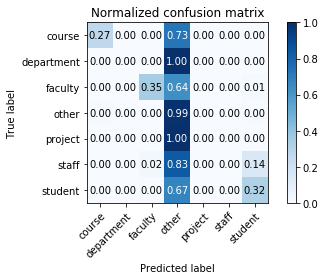


Finished model LGBMClassifier on cornell validation set
Execution Time: 00:00:52
Classification performance on university set:
Accuracy: 0.769427
Precision:0.840148
Recall:0.769427
F1_Score:0.787582

Finished model LGBMClassifier on texas validation set
Execution Time: 00:00:53
Classification performance on university set:
Accuracy: 0.761714
Precision:0.749774
Recall:0.761714
F1_Score:0.729709

Finished model LGBMClassifier on washington validation set
Execution Time: 00:00:48
Classification performance on university set:
Accuracy: 0.917431
Precision:0.913179
Recall:0.917431
F1_Score:0.913910

Finished model LGBMClassifier on wisconsin validation set
Execution Time: 00:00:46
Classification performance on university set:
Accuracy: 0.467249
Precision:0.810481
Recall:0.467249
F1_Score:0.474964
============================== Report overall cross validation performance ==============================
Accuracy: 0.718874
Precision:0.795951
Recall:0.718874
F1_Score:0.738532
Confusion matrix, w

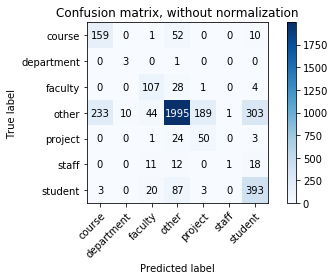

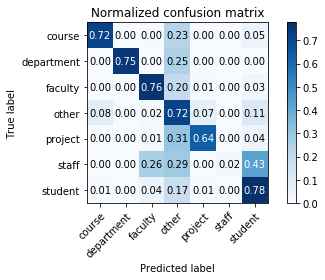

In [8]:
for clf in classifiers:
    print('='*100)
    print('='*100)
    print('='*100)
    label_t, label_p = CrossValidation.CrossValidation(clf, vectors, labels, uni, classes, partial_p=True, cfsm=True)